# **Multiple linear regression in realworld data**

In [ ]:
install.packages("mlbench")
install.packages("ggpubr")
install.packages("EnvStats")
install.packages("nortest")
install.packages("GGally")
install.packages("car")
install.packages("performance")
install.packages("see")
install.packages("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘nortest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘insight’, ‘da

In [ ]:
library(mlbench)
library(tidyverse)
library(ggpubr)
library(EnvStats)
library(nortest)
library(car)
library(GGally)
library(performance)
library(see)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:EnvStats’:

    qqPlot


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [ ]:
download.file("https://drive.usercontent.google.com/uc?id=1RpyUNzkb9YblH3jO-3kKcVca7vK_b7qG&authuser=0&export=download",
              tf <- tempfile())
wl<-readRDS(tf)

In [ ]:
glimpse(wl)

Rows: 228
Columns: 5
$ wt.loss   <dbl> 2.024298, 1.843147, 1.889649, 2.236883, 2.165876, 2.269996, …
$ age       <dbl> 74, 68, 56, 57, 60, 74, 68, 71, 53, 61, 57, 68, 68, 60, 57, …
$ pat.karno <dbl> 63.26976, 34.76611, 79.32941, 48.64521, 53.21808, 38.92208, …
$ meal.cal  <dbl> 27.72728, 28.94917, 29.89519, 29.00631, 28.40058, 27.23218, …
$ sex       <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Female", "F…


# **Data dictionary**

Variable    | Type     | Description
------------|----------|-----------------------------------------------------
`wt.loss`   | Numeric  | Weight loss in last six months
`age`       | Numeric  | Age of patient at time of recruitment
`sex`       | Numeric  | Sex of patient (Male, Female)
`pat.karno` | Numeric  | Karnofsky performance score as assessed by patient
`meal.cal`  | Numeric  | Calories consumed at meals

**Karnofsky performance score: Daily activity**

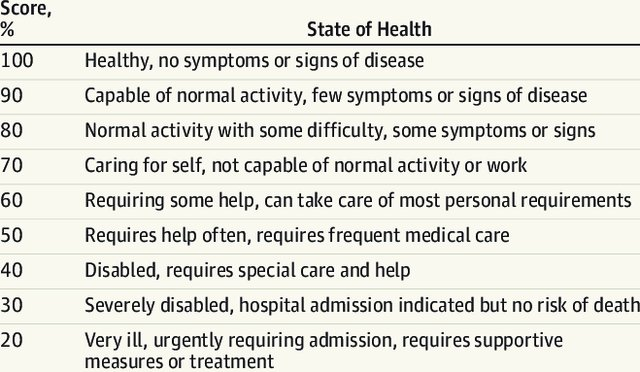

# **Set hypothesis**

In this example, we will identify the association between weigth loss (Y) and other variables (X) using multivariable linear regression.

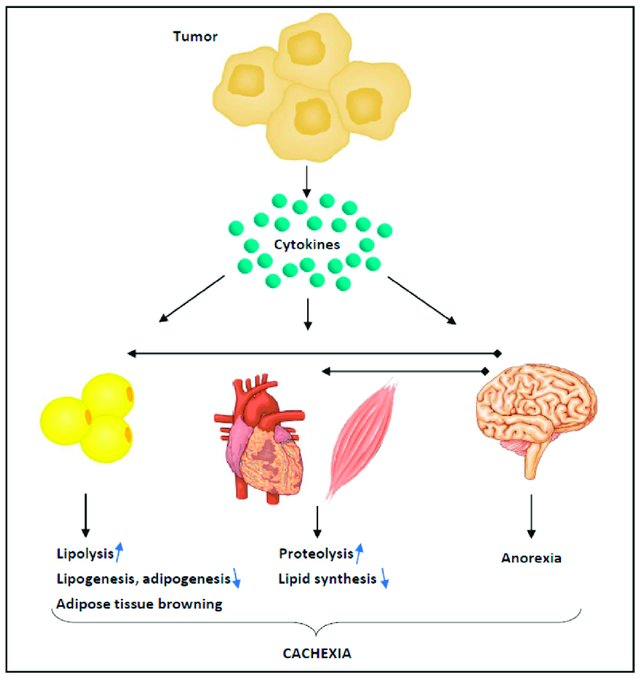

# **Explanatory manner**

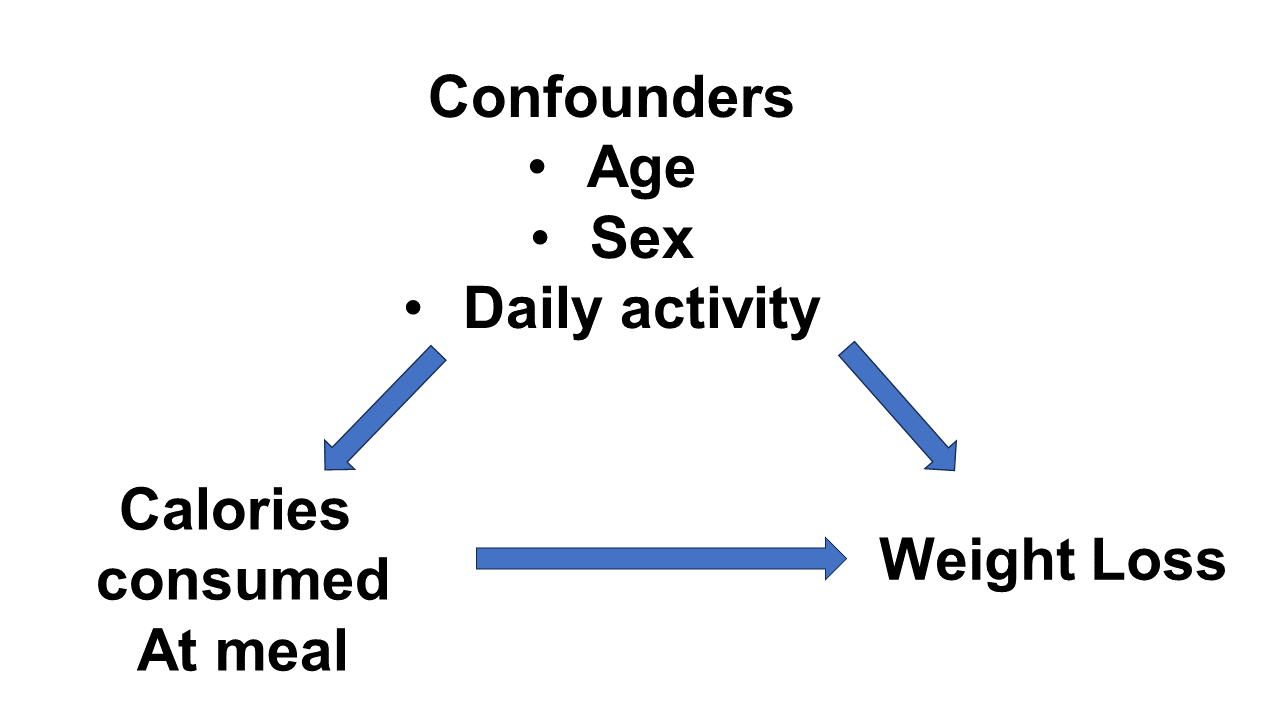

*   Outcome: Weight loss
*   Exposure of interest: Daily calories consumed



**Check class of variables**

In [ ]:
lapply(wl, class)

$wt.loss
[1] "numeric"

$age
[1] "numeric"

$pat.karno
[1] "numeric"

$meal.cal
[1] "numeric"

$sex
[1] "character"

In [ ]:
wl$sex<-factor(wl$sex,levels=c("Male","Female"))

**Visualization**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


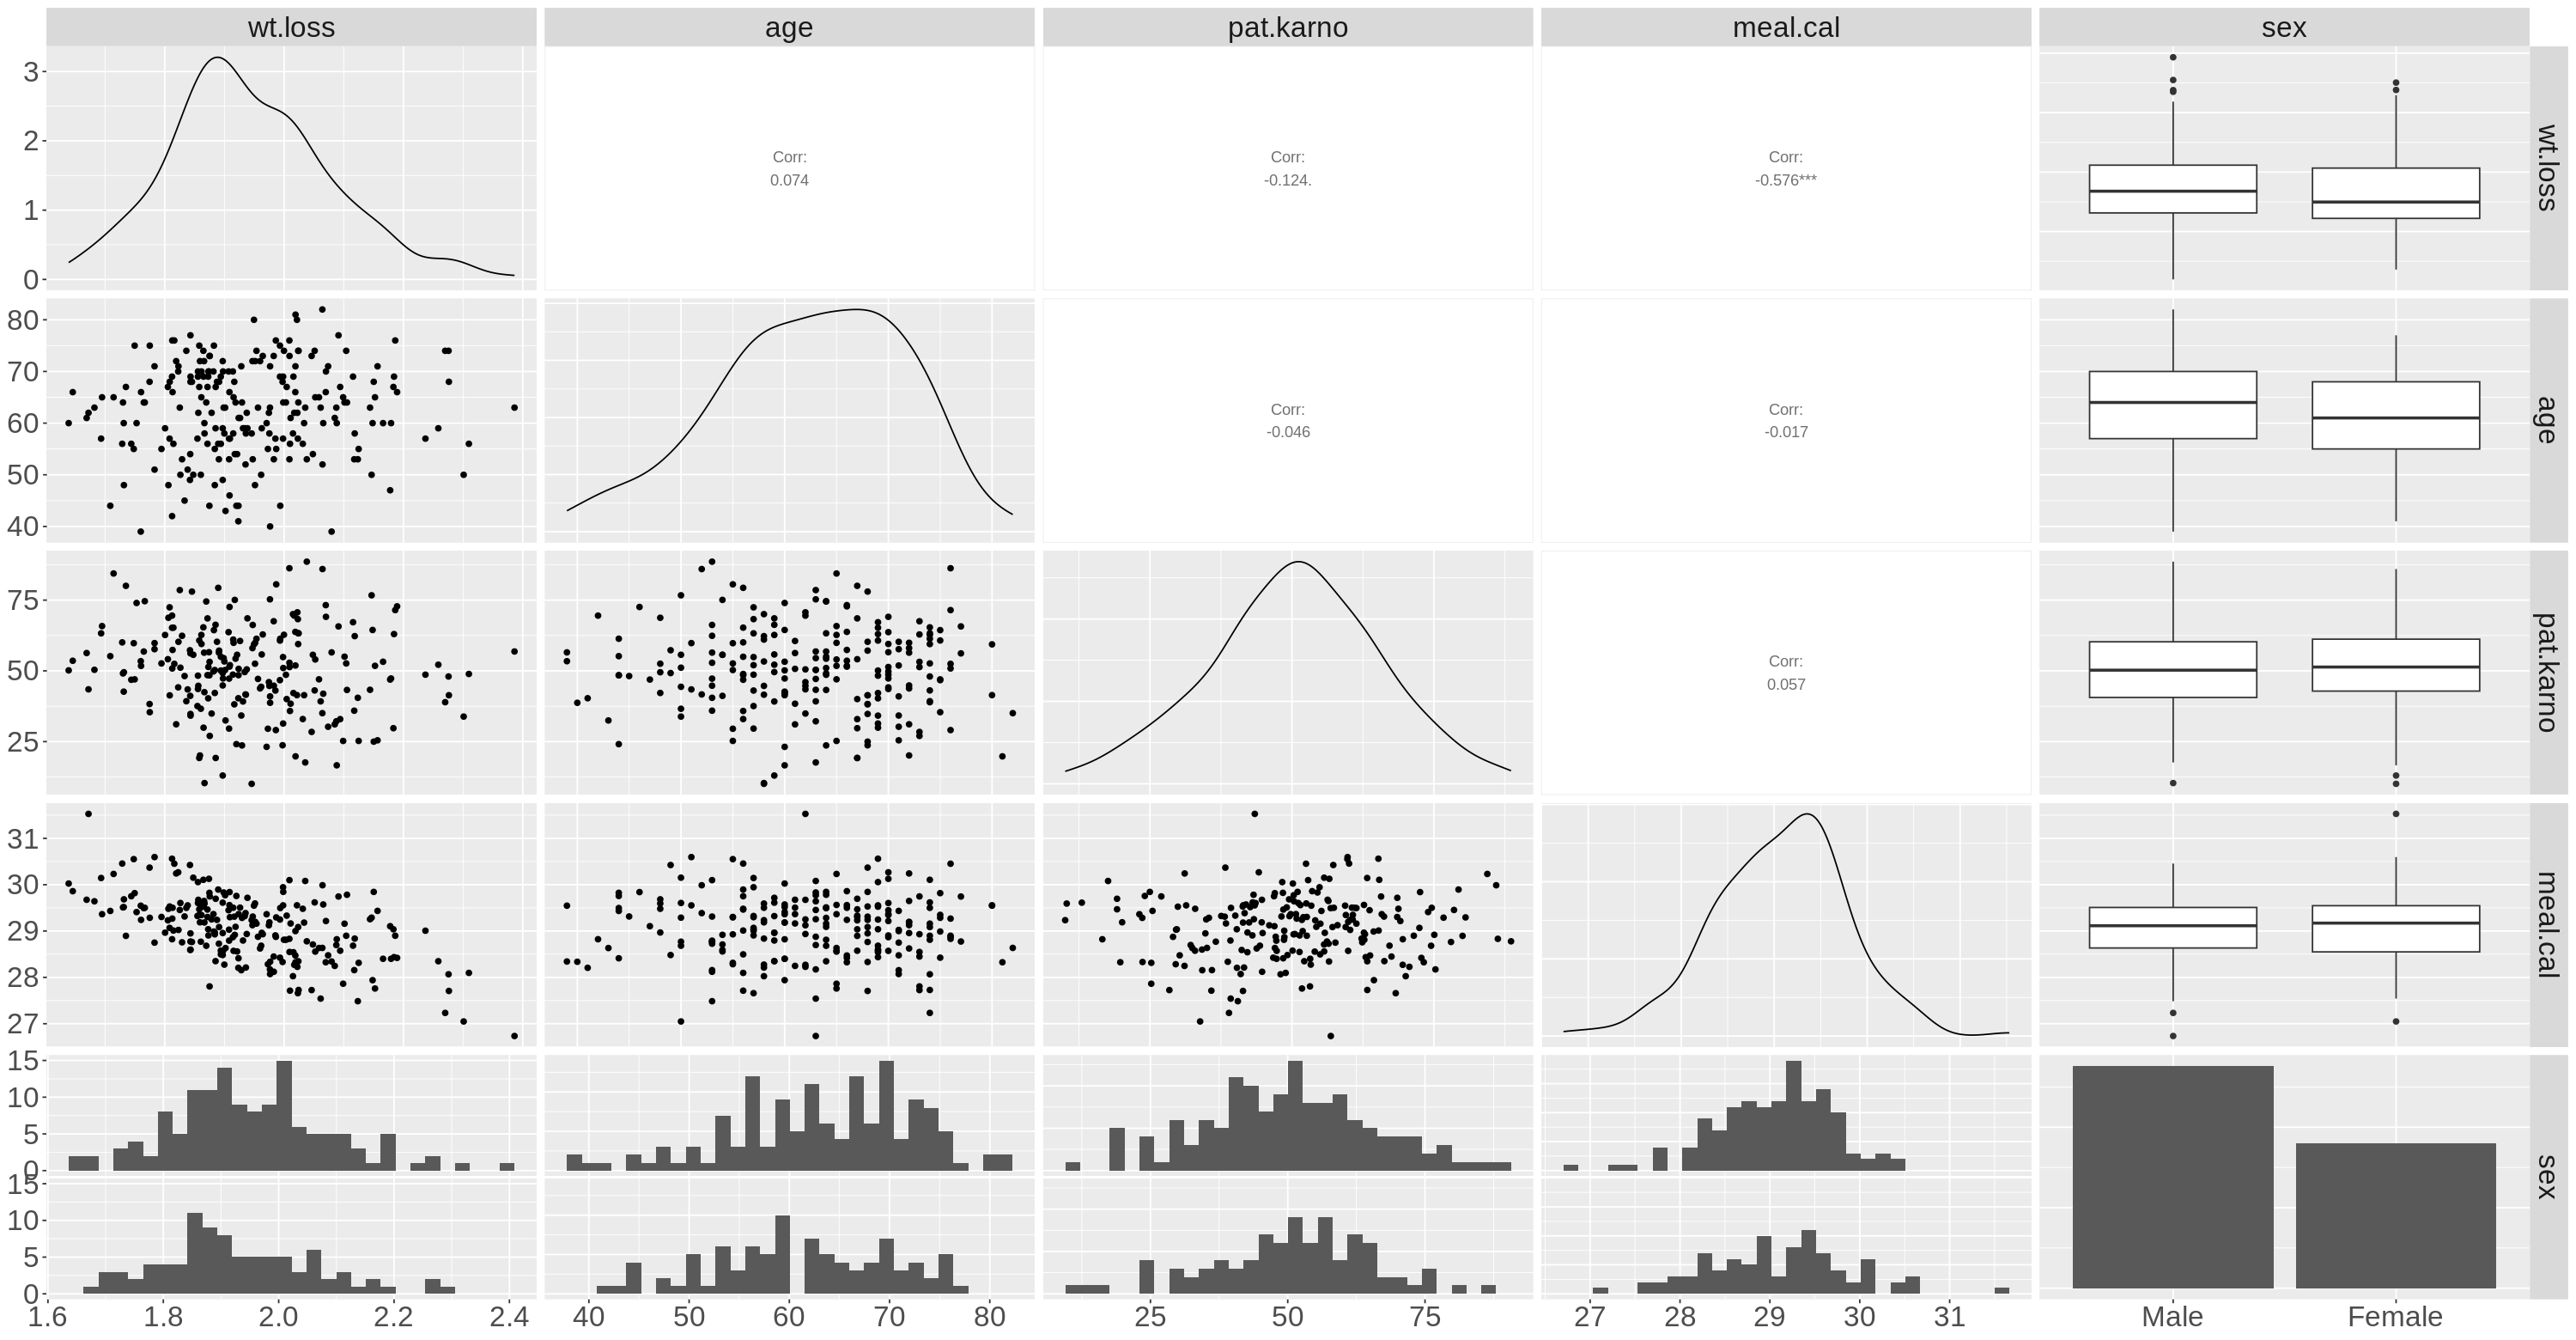

In [ ]:
options(repr.plot.width=25, repr.plot.height=13)
ggpairs(wl)+
            theme(text = element_text(size = 25))

Exposure of interest and outcome are not normally distributed.

## **Log transformation**

In [ ]:
dat<-data.frame(log.wl = log(wl$wt.loss),age=wl$age,act=wl$pat.karno,log.cal = log(wl$meal.cal),sex=wl$sex)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


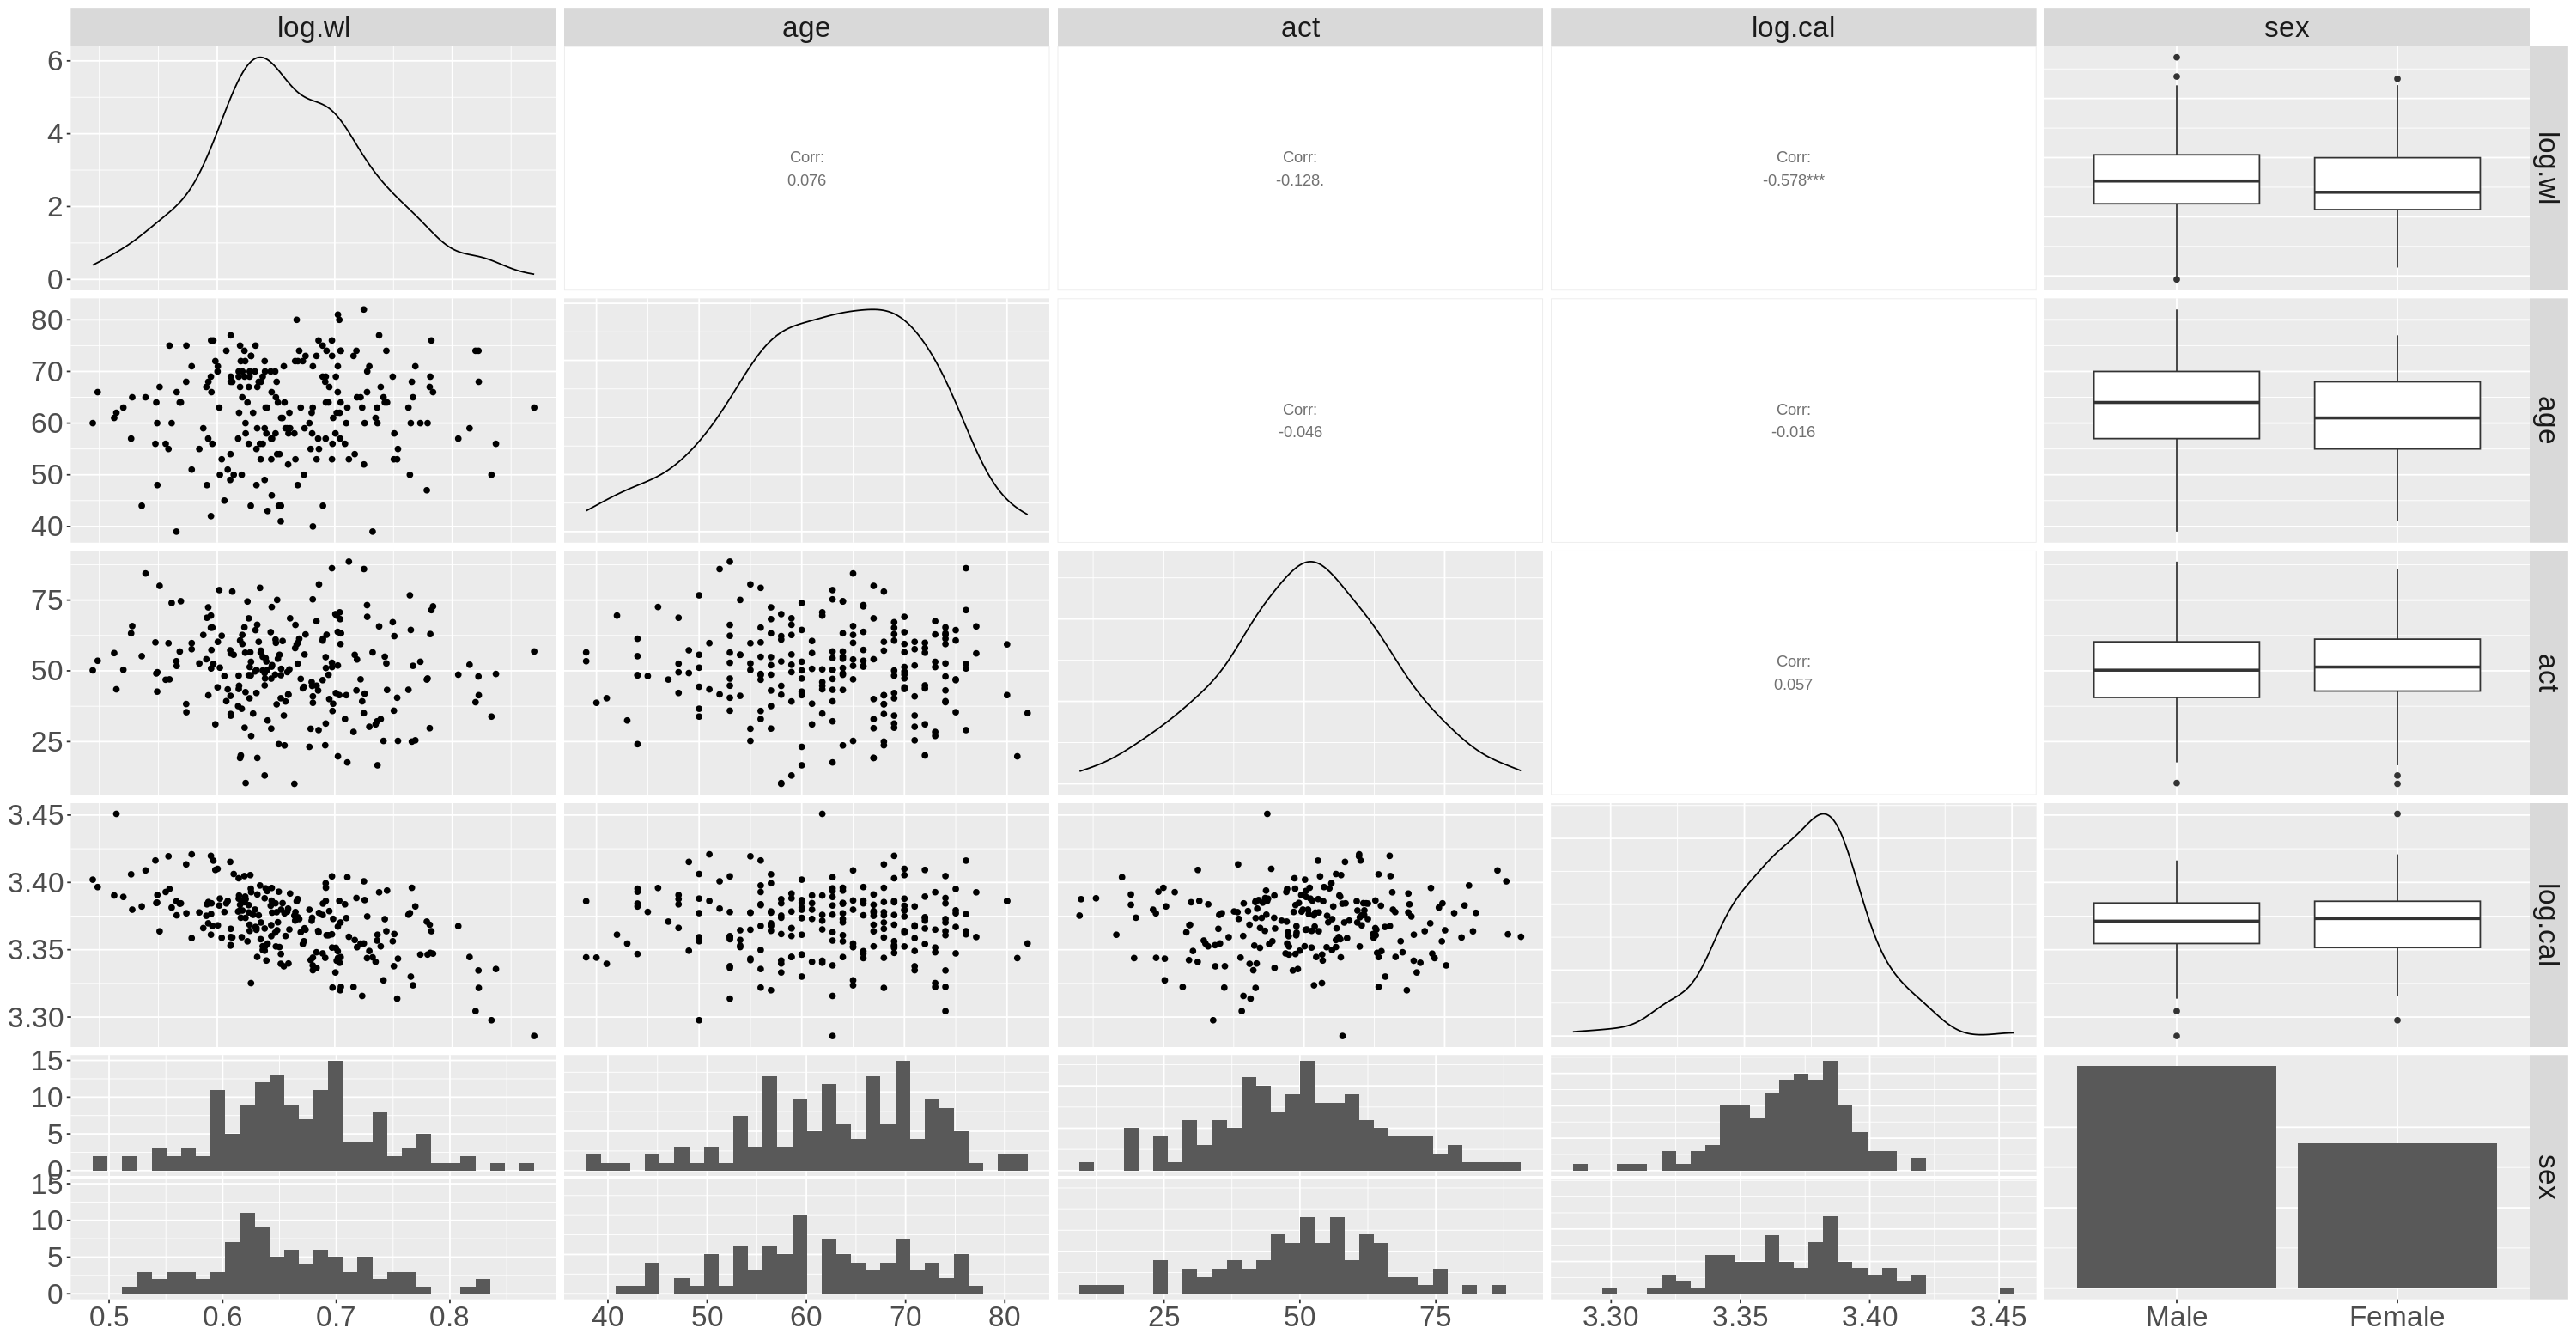

In [ ]:
ggpairs(dat)+
            theme(text = element_text(size = 25))

We have to keep all variables because we are using multivariable linear regression in an explanatory manner. Although the absolute R-value is less than 0.2, they may be confounded by both measured and unmeasured confounders."

## **Check multicollinearity**

In [ ]:
vif_result<-vif(lm(log.wl ~ log.cal + age + sex + act,dat=dat))

In [ ]:
data.frame(VIF = vif_result)

,VIF
,<dbl>
log.cal,1.004600
age,1.017191
sex,1.016408
act,1.005424


No multicollinearity among **X**

## **Perform multivariable linear regression**

In [ ]:
explan_mod<-lm(log.wl ~ log.cal + age + sex + act,dat=dat)

**Regression Diagnostics**

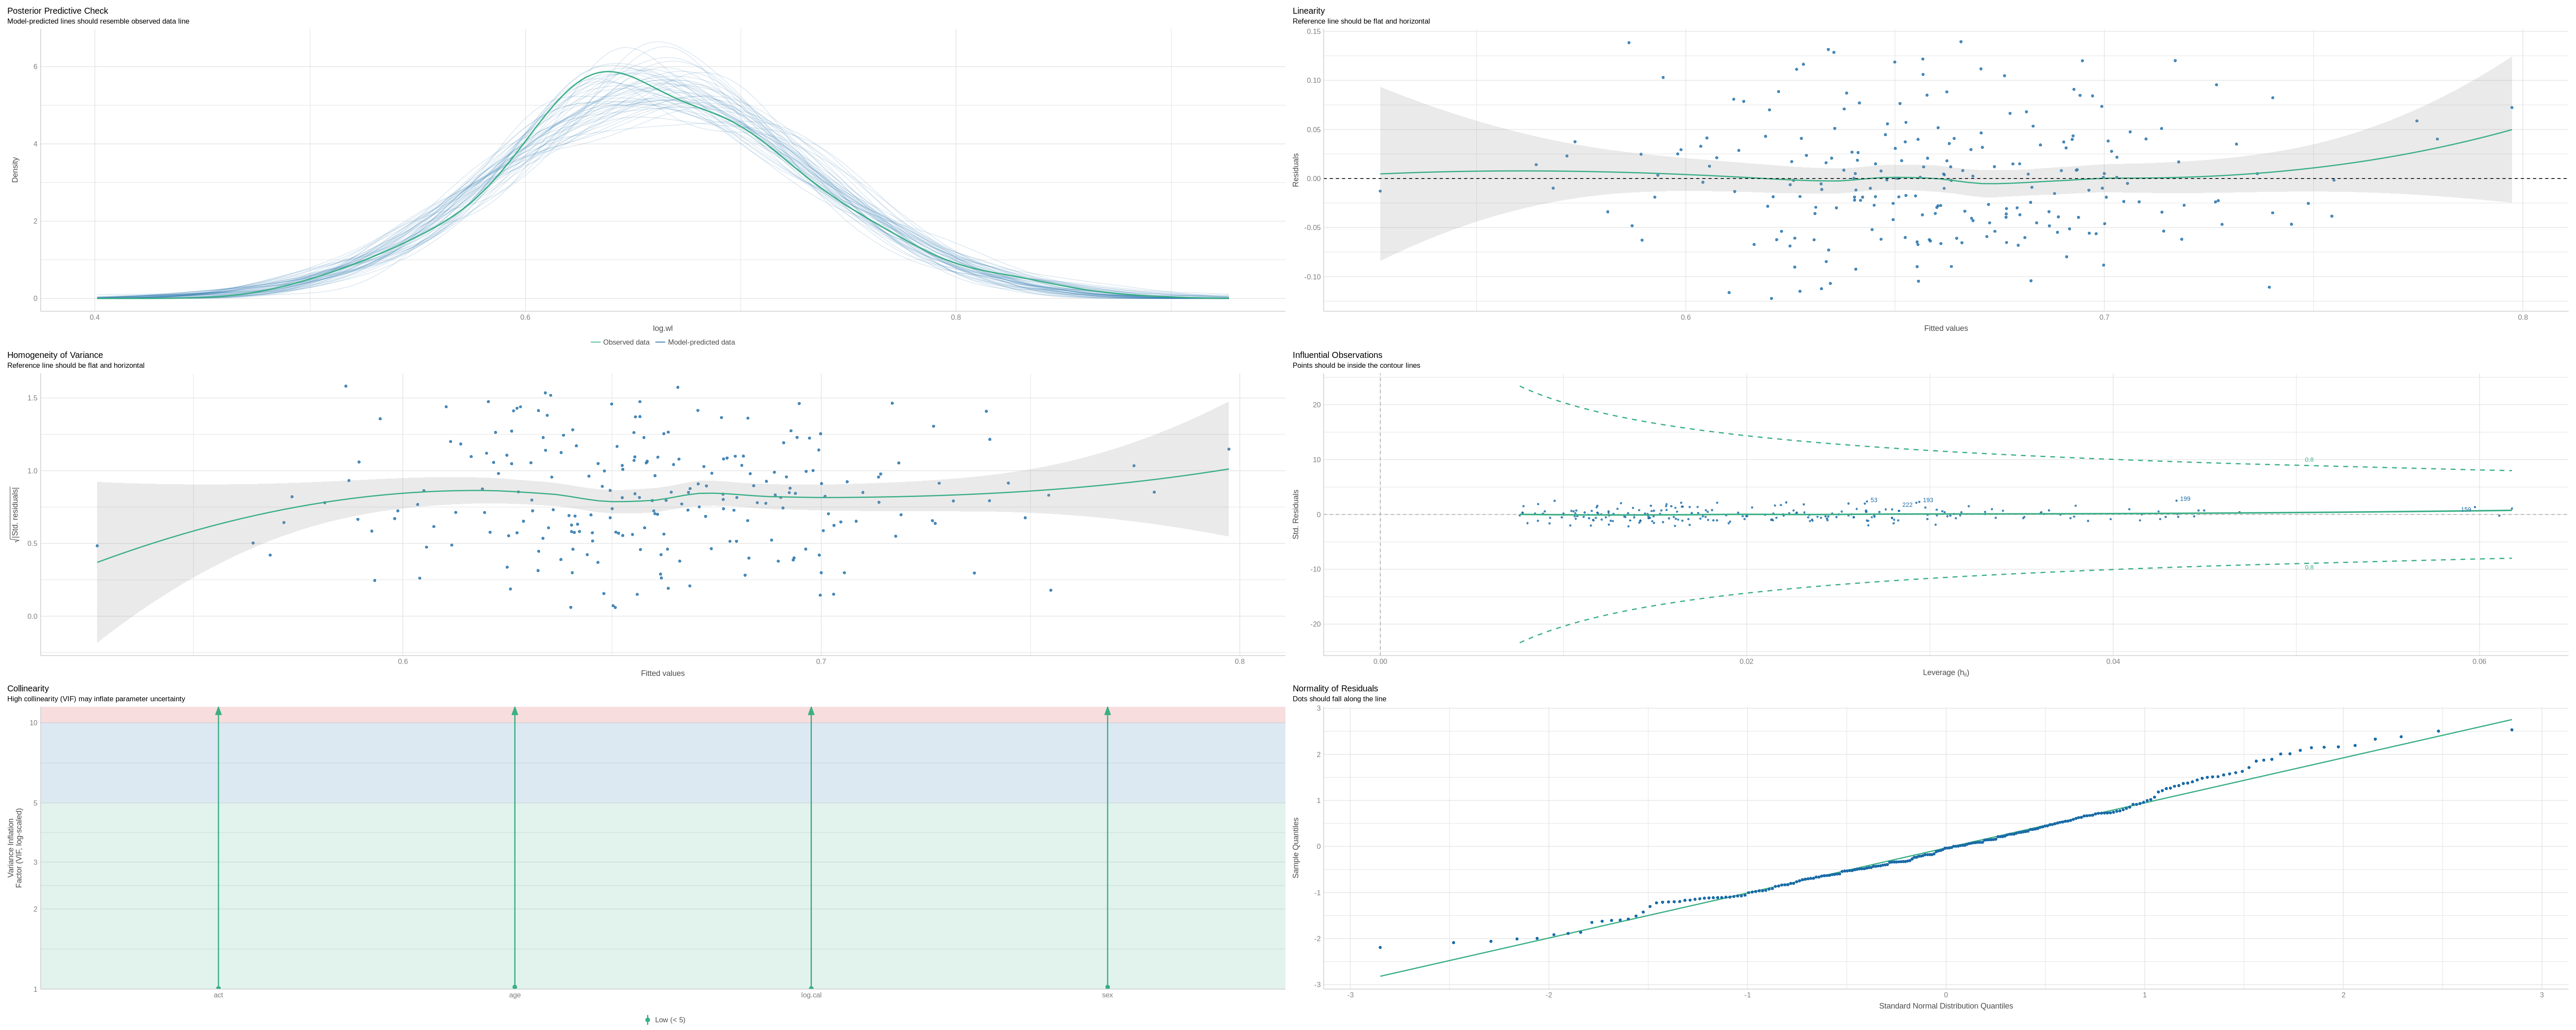

In [ ]:
options(repr.plot.width=50, repr.plot.height=20)
check_model(explan_mod)

The model with log.wl ~ log.cal + age + sex + act appears to fit well with a linear model.

In [ ]:
summary(explan_mod)


Call:
lm(formula = log.wl ~ log.cal + age + sex + act, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.122203 -0.038581 -0.002009  0.035157  0.139341 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.1291926  0.5200828  11.785   <2e-16 ***
log.cal     -1.6236973  0.1542625 -10.526   <2e-16 ***
age          0.0004307  0.0004174   1.032   0.3032    
sexFemale   -0.0076555  0.0077277  -0.991   0.3229    
act         -0.0004148  0.0002456  -1.689   0.0927 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05657 on 223 degrees of freedom
Multiple R-squared:  0.3496,	Adjusted R-squared:  0.3379 
F-statistic: 29.97 on 4 and 223 DF,  p-value: < 2.2e-16


**Interpret**

After adjusting for other variables, there is a statistically significant negative association between the log of daily calorie intake (log-cal) and the log of weight loss (log-wl), with β = -1.62. For every unit increase in log-cal, log-wl is expected to decrease by 1.6237 units.

# **Exploratory manner**

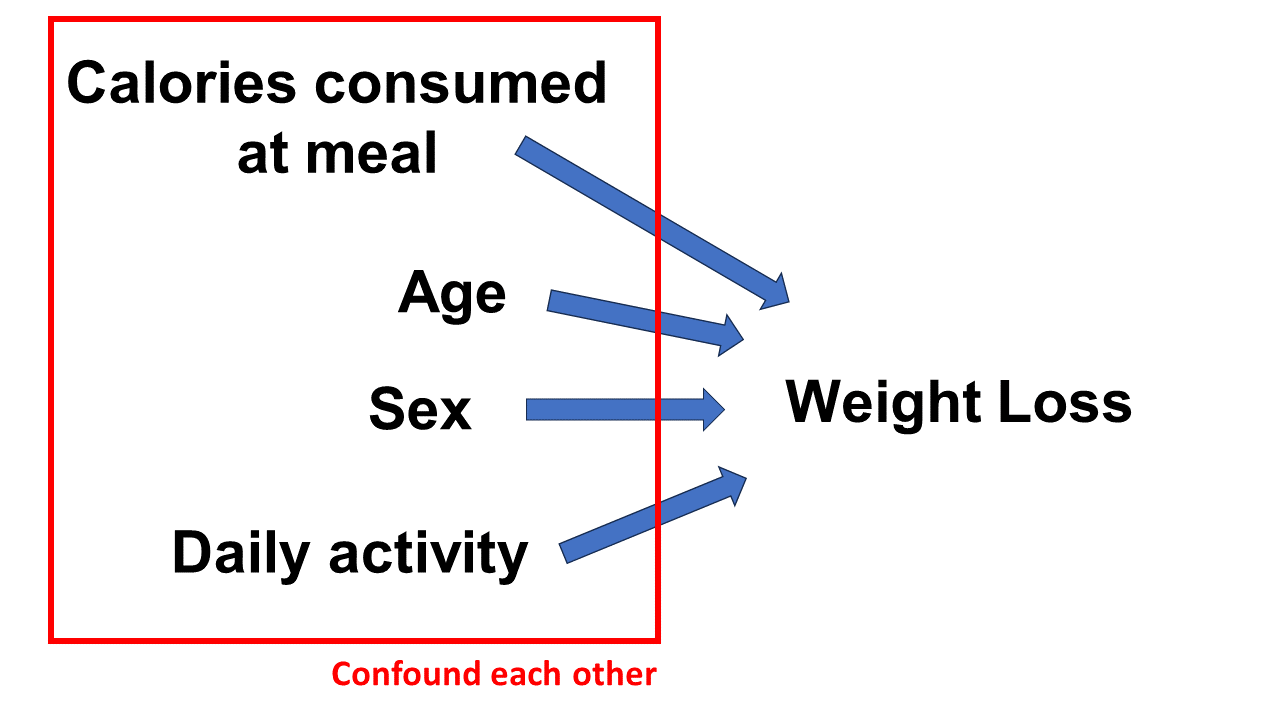

**Do everything as explanatory manner.**

Then interpret in interpret in a different way.

In [ ]:
explor_mod<-lm(log.wl ~ log.cal + age + sex + act,dat=dat)

In [ ]:
summary(explor_mod)


Call:
lm(formula = log.wl ~ log.cal + age + sex + act, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.122203 -0.038581 -0.002009  0.035157  0.139341 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.1291926  0.5200828  11.785   <2e-16 ***
log.cal     -1.6236973  0.1542625 -10.526   <2e-16 ***
age          0.0004307  0.0004174   1.032   0.3032    
sexFemale   -0.0076555  0.0077277  -0.991   0.3229    
act         -0.0004148  0.0002456  -1.689   0.0927 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05657 on 223 degrees of freedom
Multiple R-squared:  0.3496,	Adjusted R-squared:  0.3379 
F-statistic: 29.97 on 4 and 223 DF,  p-value: < 2.2e-16


After adjusting for other variables, there is only a statistically significant negative association between the log of daily calorie intake (log-cal) and the log of weight loss (log-wl), with β = -1.62. For every unit increase in log-cal, log-wl is expected to decrease by 1.6237 units. Age, sex, and daily activity percentage were not significantly associated with the log of weight loss.

# **Predictive manner**

We need a parsimonious model (few variables) to predict the outcome.

**1. Do everything like exploratory manner.**

**2. Select variables according to AIC criteria.**

We can gradually eliminate the independent variable that is least correlated with the dependent variable (i.e., the variable with the highest p-value in an ANOVA table) until each remaining variable has a significant relationship with the outcome variable. Alternatively, we can use the Akaike Information Criterion (AIC) for model selection. AIC aims to find a model that has the fewest coefficients while still providing a good fit to the data. It balances model complexity against fit quality. Typically, we begin with a comprehensive model that includes numerous independent variables, and an automated process known as the stepwise algorithm evaluates and selects the optimal model based on the lowest AIC value.

**The less AIC, the best model.**

In [ ]:
step(explor_mod)

Start:  AIC=-1304.79
log.wl ~ log.cal + age + sex + act

          Df Sum of Sq     RSS     AIC
- sex      1   0.00314 0.71686 -1305.8
- age      1   0.00341 0.71713 -1305.7
<none>                 0.71372 -1304.8
- act      1   0.00913 0.72285 -1303.9
- log.cal  1   0.35458 1.06830 -1214.8

Step:  AIC=-1305.79
log.wl ~ log.cal + age + act

          Df Sum of Sq     RSS     AIC
- age      1   0.00431 0.72117 -1306.4
<none>                 0.71686 -1305.8
- act      1   0.00924 0.72610 -1304.9
- log.cal  1   0.35718 1.07404 -1215.6

Step:  AIC=-1306.42
log.wl ~ log.cal + act

          Df Sum of Sq     RSS     AIC
<none>                 0.72117 -1306.4
- act      1   0.00983 0.73100 -1305.3
- log.cal  1   0.35832 1.07948 -1216.5



Call:
lm(formula = log.wl ~ log.cal + act, data = dat)

Coefficients:
(Intercept)      log.cal          act  
  6.1790738   -1.6311893   -0.0004299  


In [ ]:
AIC(lm(log.wl ~ log.cal,dat=dat))

[1] -656.2974

Hence, the best model would be log.wl ~ log.cal + act.

In [ ]:
pred_mod<-lm(log.wl ~ log.cal + act, data = dat)

In [ ]:
summary(pred_mod)


Call:
lm(formula = log.wl ~ log.cal + act, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.117399 -0.038974 -0.004314  0.034422  0.139977 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.1790738  0.5192622  11.900   <2e-16 ***
log.cal     -1.6311893  0.1542760 -10.573   <2e-16 ***
act         -0.0004299  0.0002455  -1.751   0.0813 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05661 on 225 degrees of freedom
Multiple R-squared:  0.3428,	Adjusted R-squared:  0.337 
F-statistic: 58.69 on 2 and 225 DF,  p-value: < 2.2e-16


**Interpretation**

The best linear regression equation to predict log of weight loss can be expressed as:
$$
\text{log.wl} = 6.1790738 - 1.6311893 \times \text{log.cal} - 0.0004299 \times \text{act} + \epsilon
$$


**Intercept (6.1790738):** When both `log.cal` and `act` are zero, the expected value of `log.wl` is approximately 6.18. However, it's essential to note that the intercept might not have a meaningful interpretation in this specific context unless the zero values of `log.cal` and `act` make sense in your data set.

**Coefficient for log.cal (-1.6311893):** For every one-unit increase in `log.cal`, the `log.wl` is expected to decrease by approximately 1.63 units, holding `act` constant. This coefficient is statistically significant, as indicated by the p-value \( < 2e-16 \).

**Coefficient for act (-0.0004299):** For every one-unit increase in `act`, the `log.wl` is expected to decrease by approximately 0.00043 units, holding `log.cal` constant. The coefficient is not as statistically significant compared to `log.cal`, as indicated by the p-value 0.0813, which is above common significance levels like 0.05.